In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

In [19]:
data_new_blade = pd.read_csv("../files/prediction_new_blade_tanh.csv", sep=";")
data_residuals = pd.read_csv("../files/residual_new_blade.csv", sep=";")
data_worn_blade = pd.read_csv("../files/prediction_worn_blade.csv", sep=";")

# Visualisation of Prediction - New Blade
## Sensor Value Prediction

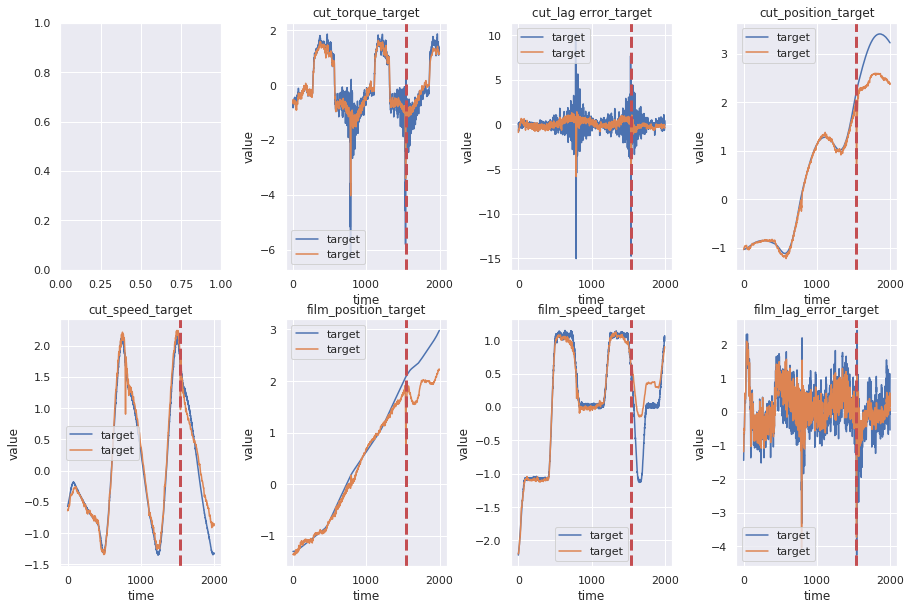

In [38]:
fig, axes = plt.subplots(2, 4, figsize=(15,10))
ax = axes.ravel()
columns = data_new_blade.columns
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(1,8):
    sns.lineplot(data=data_new_blade, x="timestamp", y=columns[i], ax=ax[i], label="target")
    sns.lineplot(data=data_new_blade, x="timestamp", y=columns[i+7], ax=ax[i], label="target")
    ax[i].axvline(1536, 0,2, color="r", linestyle ="--", linewidth=3, label="train-validation")
    #plt.text(1570, 2, 'validation data', fontsize=12)
    #plt.text(1300, 2, 'training data', fontsize=12)
    ax[i].set(xlabel='time', ylabel='value')
    ax[i].set(title=columns[i])
plt.show()

## Visualisation of Residuals

In [20]:
# Computation of Residuals
# Create empty dataframe
columns_residual = ["timestamp", "cut_torque_residuas", "cut_lag_error_residual", "cut_position_residual", "cut_speed_residual", 
           "film_position_residual", "film_speed_residual", "film_lag_error_residual"]
columns_original = data_new_blade.columns
df = pd.DataFrame(columns=columns)

# Compute Residuals
for i in range(1,8):
    df[columns_residual[i]] = data_new_blade[columns_original[i]] - data_new_blade[columns_original[i+7]]

df["timestamp"]=data_new_blade["timestamp"]

# Save dataframe as csv file
#df.to_csv("../visualisation/files/residual_new_blade.csv", sep=";", index=False)

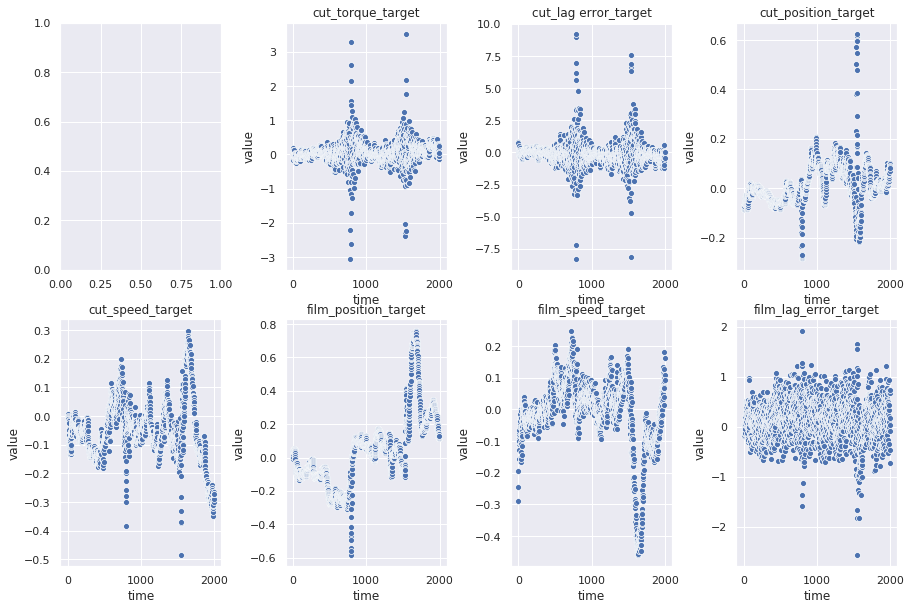

In [37]:
fig, axes = plt.subplots(2, 4, figsize=(15,10))
ax = axes.ravel()
columns = data_new_blade.columns
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(1,8):
    sns.scatterplot(data=data_residuals, x="timestamp", y=data_residuals[data_residuals.columns[i]], ax=ax[i]) #scatter_kws={"s": 10})
    ax[i].set(xlabel='time', ylabel='value')
    ax[i].set(title=columns[i])
plt.show()

### Distribution of Residuals
1. The residuals are normally distributed
2. The residuals have zero mean.

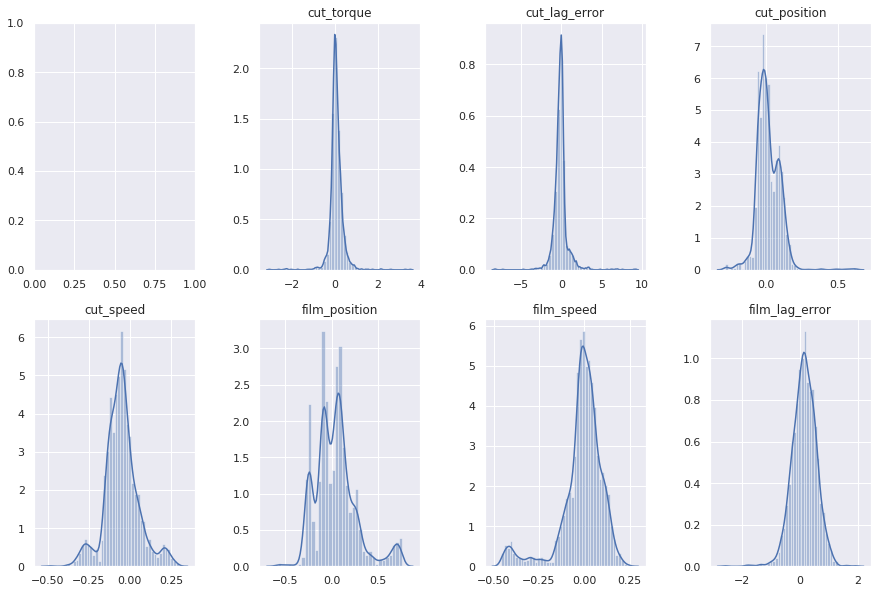

In [39]:
columns= ["timestamp", "cut_torque", "cut_lag_error", "cut_position", "cut_speed", 
           "film_position", "film_speed", "film_lag_error"]
fig, axes = plt.subplots(2, 4, figsize=(15,10))
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(1, 8):
    sns.distplot(data_residuals.iloc[:,i], ax=ax[i])
    ax[i].set(title=columns[i])
    ax[i].set(xlabel=' ')
plt.show()

### Autocorrelation of Residuals
1. High autocorrelation of residuals

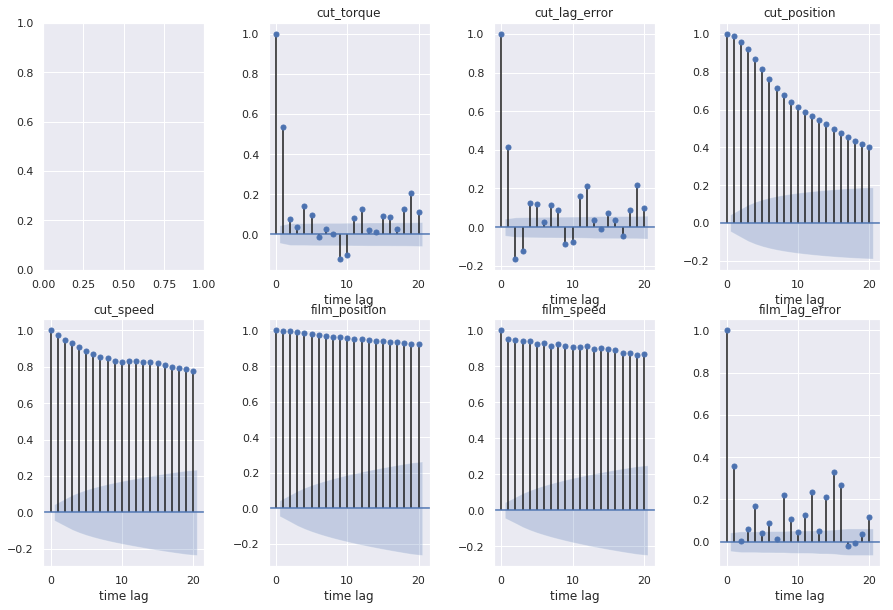

In [40]:
fig, axes = plt.subplots(2, 4, figsize=(15,10))
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(1, 8):
    plot_acf(data_residuals.iloc[:,i], lags=20, ax=ax[i])
    ax[i].set_title(columns[i])
    ax[i].set_xlabel('time lag')
plt.show()

# Visualisation of Prediction - Worn Blade
## Sensor Value Prediction

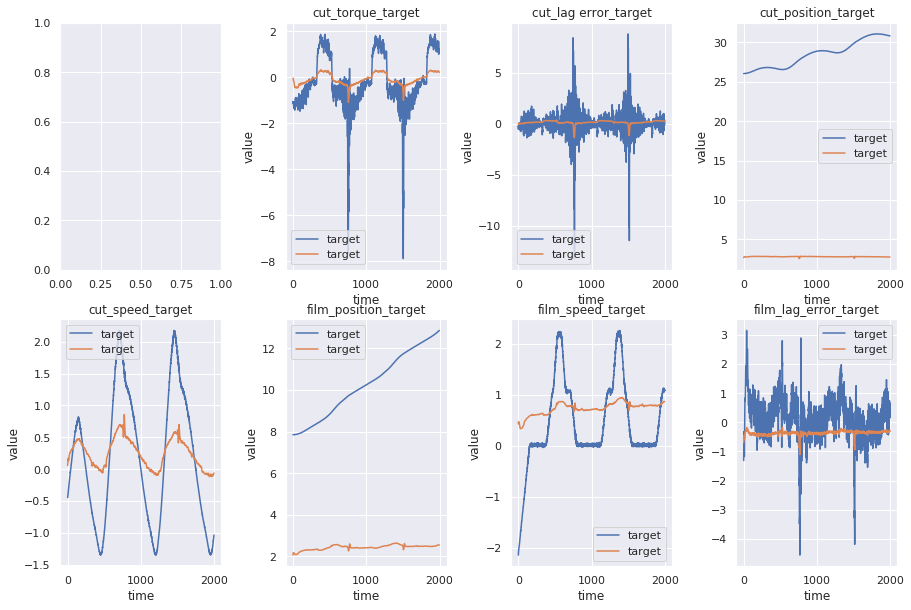

In [41]:
fig, axes = plt.subplots(2, 4, figsize=(15,10))
ax = axes.ravel()
columns = data_new_blade.columns
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(1,8):
    sns.lineplot(data=data_worn_blade, x="timestamp", y=columns[i], ax=ax[i], label="target")
    sns.lineplot(data=data_worn_blade, x="timestamp", y=columns[i+7], ax=ax[i], label="target")
    ax[i].set(xlabel='time', ylabel='value')
    ax[i].set(title=columns[i])
plt.show()